In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [6]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

SVC()

In [7]:
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

acc_linear = accuracy_score(y_test, y_pred_linear)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

In [8]:
print(f"Linear Kernel Accuracy: {acc_linear:.2f}")
print(f"RBF Kernel Accuracy: {acc_rbf:.2f}")

Linear Kernel Accuracy: 0.83
RBF Kernel Accuracy: 0.98


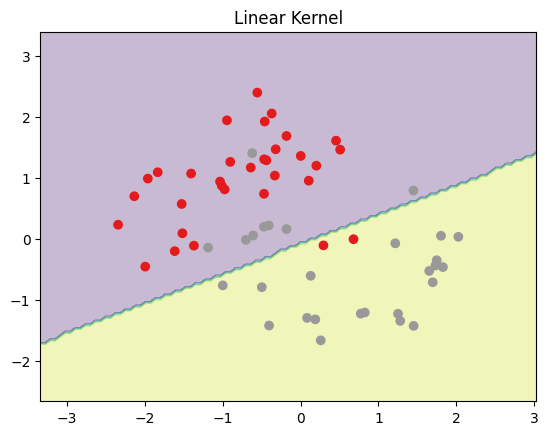

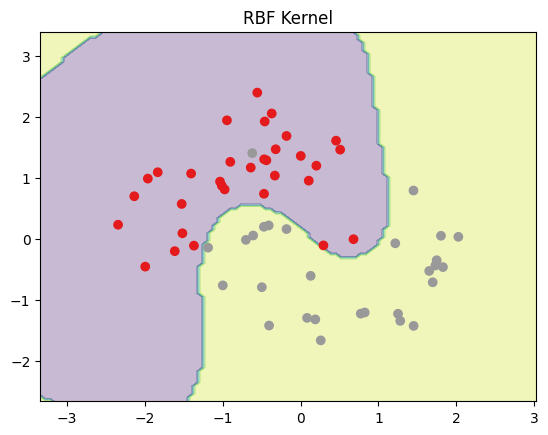

In [9]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X_test_scaled, y_test, "Linear Kernel")
plot_decision_boundary(svm_rbf, X_test_scaled, y_test, "RBF Kernel")